In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Dostop do datoteke
file_path = '../PrometneNesreče.csv'
data = pd.read_csv(file_path)

C:\Users\Hana\AppData\Local\Temp\ipykernel_20760\2677043888.py:3: DtypeWarning: Columns (31,32,33,34,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


### Število nesreč po urah

In [3]:
# Pretvori stolpec 'NastanekDatumCas' v pravilen format (vsaka vrednost bo pandas objekt za datum in čas)
data['NastanekDatumCas'] = pd.to_datetime(data['NastanekDatumCas'], format='ISO8601', errors='coerce')

# Za vsak vnos pridobi znotraj, katere ure se je zgodil
hours = data['NastanekDatumCas'].dt.hour

accidents_per_hour = hours.value_counts()

# Uredi podatke po vrstnem redu ur (naraščajoče)
accidents_per_hour = accidents_per_hour.sort_index()

#print(accidents_per_hour)


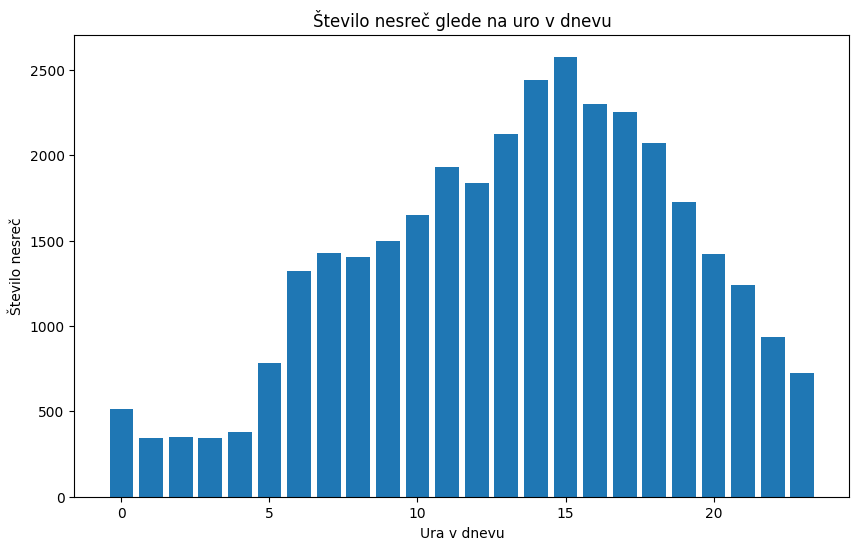

In [4]:
# Stolpčni diagram
plt.figure(figsize=(10, 6))
plt.bar(accidents_per_hour.index, accidents_per_hour.values)

plt.xlabel('Ura v dnevu')
plt.ylabel('Število nesreč')
plt.title('Število nesreč glede na uro v dnevu')

plt.show()

# **Resnost posledic prometnih nesreč**

Tri kategorije nesreč:
- **Nesreče brez poškodovancev**: udeleženci niso bili poškodovani in nihče ni umrl
- **Nesreče s poškodbami**: nekateri udeleženci so bili poškodovani, vendar nihče ni umrl
- **Nesreče s smrtnim izidom**: vsaj eden od udeležencev je umrl (v nesreči so bili lahko tudi drugi, ki so bili poškodovani, vendar take nesreče ne štejem v kategorijo "Nesreče s poškodbami")

### Nesreče brez poškodovancev

In [5]:
# Nesreč brez poškodovancev in smrtnih žrtev
mild_accidents_entries = data[(data['LjudjeMrtvi'] == 0) & (data['LjudjePoskodovani'] == 0)]

# Za vsak vnos pridobi znotraj, katere ure se je zgodil
mild_hours = mild_accidents_entries['NastanekDatumCas'].dt.hour

mild_accidents_per_hour = mild_hours.value_counts()

# Uredi podatke po vrstnem redu ur (naraščajoče)
mild_accidents_per_hour = mild_accidents_per_hour.sort_index()

#print(mild_accidents_per_hour)

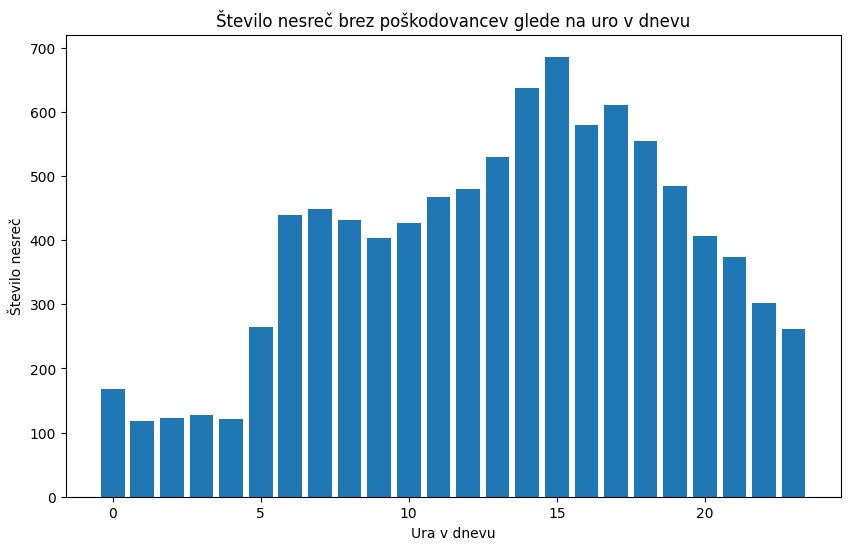

In [6]:
# Stolpčni diagram
plt.figure(figsize=(10, 6))
plt.bar(mild_accidents_per_hour.index, mild_accidents_per_hour.values)

plt.xlabel('Ura v dnevu')
plt.ylabel('Število nesreč')
plt.title('Število nesreč brez poškodovancev glede na uro v dnevu')

plt.show()

### Nesreče s poškodbami

In [7]:
# Nesreče s poškodbami (vendar brez smrtnih žrtev)
injury_accidents_entries = data[(data['LjudjeMrtvi'] == 0) & (data['LjudjePoskodovani'] != 0)]

# Za vsak vnos pridobi znotraj, katere ure se je zgodil
injury_hours = injury_accidents_entries['NastanekDatumCas'].dt.hour

injury_accidents_per_hour = injury_hours.value_counts()

# Uredi podatke po vrstnem redu ur (naraščajoče)
injury_accidents_per_hour = injury_accidents_per_hour.sort_index()

#print(injury_accidents_per_hour)

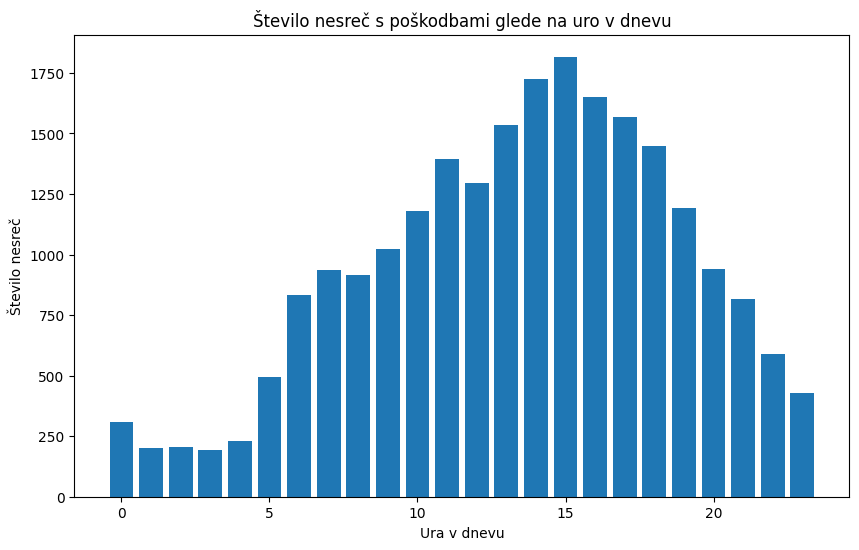

In [8]:
# Stolpčni diagram
plt.figure(figsize=(10, 6))
plt.bar(injury_accidents_per_hour.index, injury_accidents_per_hour.values)

plt.xlabel('Ura v dnevu')
plt.ylabel('Število nesreč')
plt.title('Število nesreč s poškodbami glede na uro v dnevu')

plt.show()

### Nesreče s smrtnim izidom

In [9]:
# Nesreče s smrtnimi žrtvami
death_accidents_entries = data[(data['LjudjeMrtvi'] != 0)]

# Za vsak vnos pridobi znotraj, katere ure se je zgodil
death_hours = death_accidents_entries['NastanekDatumCas'].dt.hour

death_accidents_per_hour = death_hours.value_counts()

# Uredi podatke po vrstnem redu ur (naraščajoče)
death_accidents_per_hour = death_accidents_per_hour.sort_index()

#print(death_accidents_per_hour)

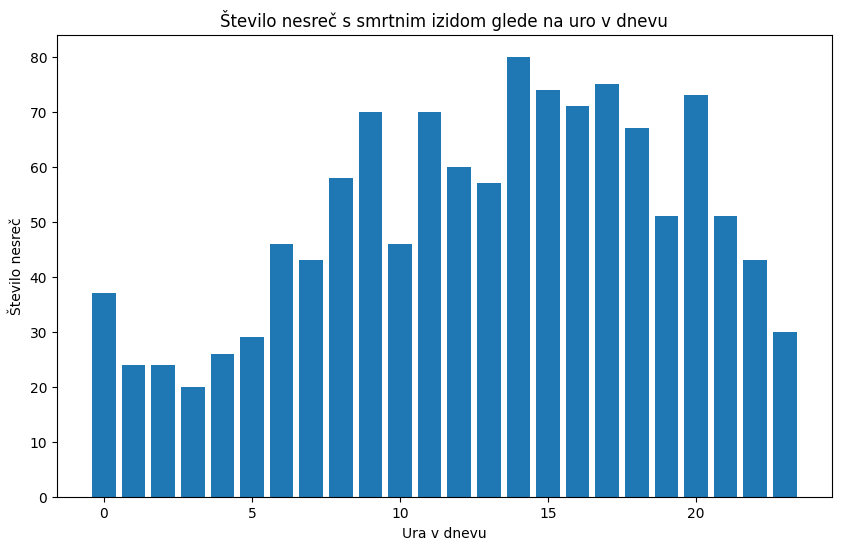

In [10]:
# Stolpčni diagram
plt.figure(figsize=(10, 6))
plt.bar(death_accidents_per_hour.index, death_accidents_per_hour.values)

plt.xlabel('Ura v dnevu')
plt.ylabel('Število nesreč')
plt.title('Število nesreč s smrtnim izidom glede na uro v dnevu')

plt.show()

### Prikaz števila vseh treh kategorij nesreč

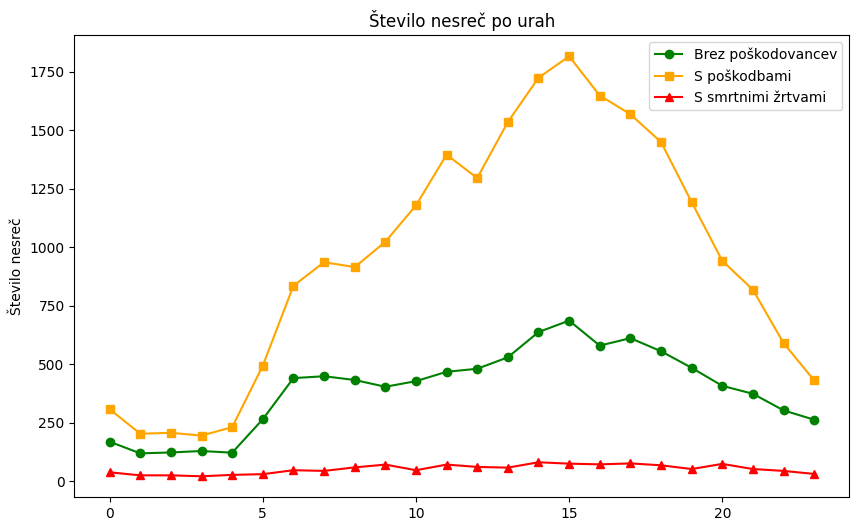

In [11]:
plt.figure(figsize=(10, 6))

plt.plot(mild_accidents_per_hour.index, mild_accidents_per_hour.values, marker='o', linestyle='-', label='Brez poškodovancev', color='green')
plt.plot(mild_accidents_per_hour.index, injury_accidents_per_hour.values, marker='s', linestyle='-', label='S poškodbami', color='orange')
plt.plot(mild_accidents_per_hour.index, death_accidents_per_hour.values, marker='^', linestyle='-', label='S smrtnimi žrtvami', color='red')

plt.ylabel('Število nesreč')
plt.title('Število nesreč po urah')
plt.legend()

plt.show()

### Prikaz normaliziranih vrednosti za lažjo primerjavo

X_norm = (X - X_min) / (X_max - X_min)

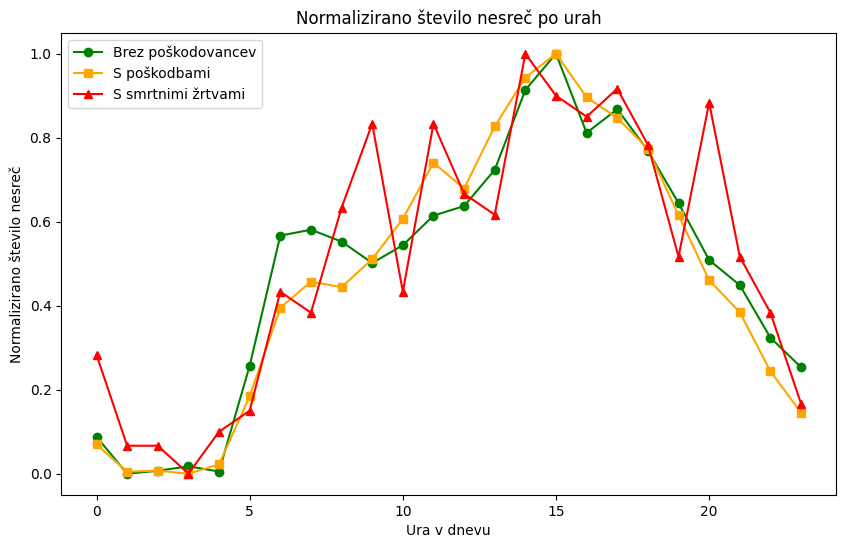

In [12]:
# Normaliziranje
mild_norm = (mild_accidents_per_hour.values - np.min(mild_accidents_per_hour.values)) / (np.max(mild_accidents_per_hour.values) - np.min(mild_accidents_per_hour.values))
injury_norm = (injury_accidents_per_hour.values - np.min(injury_accidents_per_hour.values)) / (np.max(injury_accidents_per_hour.values) - np.min(injury_accidents_per_hour.values))
death_norm = (death_accidents_per_hour.values - np.min(death_accidents_per_hour.values)) / (np.max(death_accidents_per_hour.values) - np.min(death_accidents_per_hour.values))

plt.figure(figsize=(10, 6))

plt.plot(mild_accidents_per_hour.index, mild_norm, marker='o', linestyle='-', label='Brez poškodovancev', color='green')
plt.plot(mild_accidents_per_hour.index, injury_norm, marker='s', linestyle='-', label='S poškodbami', color='orange')
plt.plot(mild_accidents_per_hour.index, death_norm, marker='^', linestyle='-', label='S smrtnimi žrtvami', color='red')

plt.xlabel('Ura v dnevu')
plt.ylabel('Normalizirano število nesreč')
plt.title('Normalizirano število nesreč po urah')
plt.legend()

plt.show()
